### Function generation

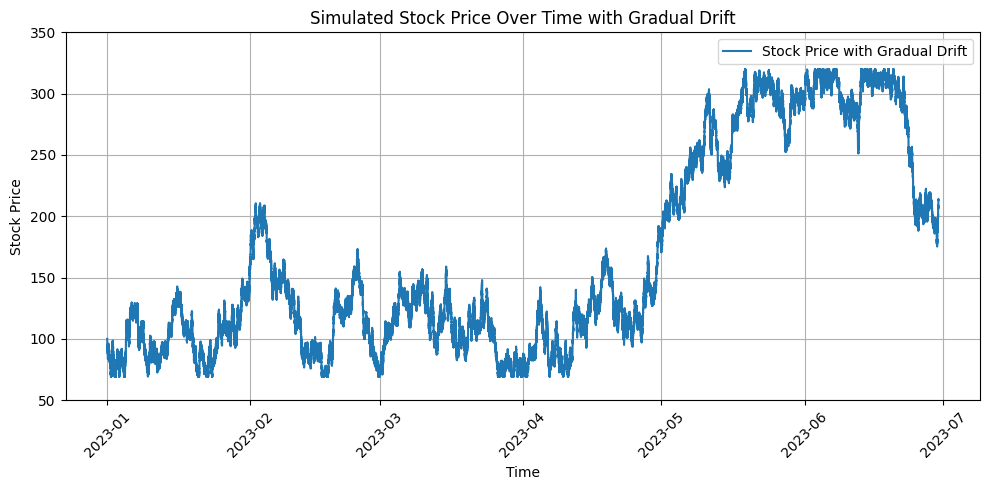

In [27]:
#This function generates the Floating poiunt value at every 1 minute interval (for checking the performance of fucntion i have taken 180 days)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_stock_price_with_gradual_drift(n_days=180, initial_price=100, final_price=190,
                                            max_stock_price=320, min_stock_price=69,
                                            noise_scale=0.5, daily_oscillation_amplitude=5.0,
                                            monthly_oscillation_amplitude=5.0, drift_strength=0.001):
    timestamps = pd.date_range(start='2023-01-01', periods=n_days * 24 * 60, freq='min')

    # Initialize price array and set first value as the initial price
    stock_price = np.zeros(len(timestamps))
    stock_price[0] = initial_price

    # Gradual long-term drift factor to smoothly move towards the final price
    total_drift = (final_price - initial_price) / (n_days * 24 * 60)

    # Adding a random direction to the trend (either positive or negative) but keeping it smooth
    drift_direction = np.random.choice([-1, 1])  # Initial random drift direction
    drift_trend = np.linspace(0, drift_direction * drift_strength, len(timestamps))  # Gradual drift

    for i in range(1, len(timestamps)):
        # Apply the drift (smoothly changes over time)
        proposed_price = stock_price[i - 1] + total_drift + drift_trend[i] + np.random.normal(0, noise_scale)

        # Ensure proposed price doesn't stagnate at the max or min stock price
        if proposed_price >= max_stock_price:
            proposed_price = stock_price[i - 1] - np.abs(np.random.normal(0, noise_scale))  # Move away from max
        elif proposed_price <= min_stock_price:
            proposed_price = stock_price[i - 1] + np.abs(np.random.normal(0, noise_scale))  # Move away from min

        # Ensure no consecutive prices are exactly the same
        if proposed_price == stock_price[i - 1]:
            proposed_price += np.random.uniform(-0.1, 0.1)  # Slight adjustment to break equality

        # Set the current price
        stock_price[i] = np.clip(proposed_price, min_stock_price, max_stock_price)

    # Calculate daily and monthly oscillations
    daily_oscillation = daily_oscillation_amplitude * np.sin(2 * np.pi * np.arange(len(timestamps)) / (24 * 60))
    monthly_oscillation = monthly_oscillation_amplitude * np.sin(2 * np.pi * np.arange(len(timestamps)) / (30 * 24 * 60))

    # Add oscillations to the price trend
    stock_price += daily_oscillation + monthly_oscillation

    # Ensure the stock prices remain bounded by the max/min prices after oscillations
    stock_price = np.clip(stock_price, min_stock_price, max_stock_price)

    # Ensure no stagnation at the extreme points after oscillation
    for i in range(1, len(stock_price)):
        if stock_price[i] == stock_price[i - 1]:  # Ensure no consecutive same values
            stock_price[i] += np.random.uniform(-0.1, 0.1)
            stock_price[i] = np.clip(stock_price[i], min_stock_price, max_stock_price)

    # Convert to DataFrame
    stock_df = pd.DataFrame({
        'timestamp': timestamps,
        'stock_price': stock_price
    })

    return stock_df

# Generate stock price data with gradual drift and no extreme jumps
stock_data_with_gradual_drift = generate_stock_price_with_gradual_drift(n_days=180, initial_price=100, final_price=190)

# Plotting the generated stock price data
plt.figure(figsize=(10, 5))
plt.plot(stock_data_with_gradual_drift['timestamp'], stock_data_with_gradual_drift['stock_price'], label='Stock Price with Gradual Drift')
plt.title('Simulated Stock Price Over Time with Gradual Drift')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.ylim(50, 350)  # Set y-axis limits to see the range
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


<ipython-input-1-f11636cda4d6>:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start='2010-01-01', periods=n_days * 24 * 60, freq='T')


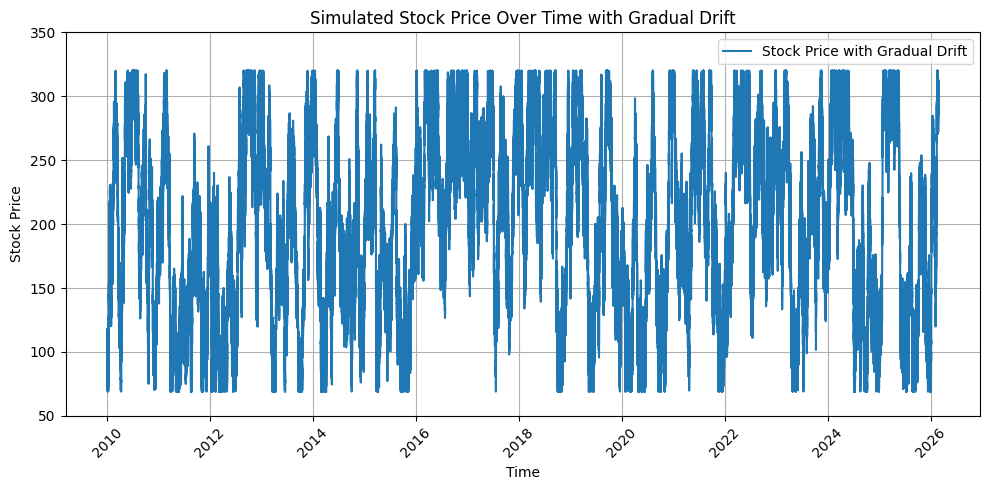

In [1]:
#Using the same function as above now i have taken a start date of 01-01-2010 and this function will generate the outputs for 5900 days)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_stock_price_with_gradual_drift(n_days=5900, initial_price=100, final_price=190,
                                            max_stock_price=320, min_stock_price=69,
                                            noise_scale=0.5, daily_oscillation_amplitude=5.0,
                                            monthly_oscillation_amplitude=5.0, drift_strength=0.001):
    timestamps = pd.date_range(start='2010-01-01', periods=n_days * 24 * 60, freq='min')

    # Initialize price array and set first value as the initial price
    stock_price = np.zeros(len(timestamps))
    stock_price[0] = initial_price

    # Gradual long-term drift factor to smoothly move towards the final price
    total_drift = (final_price - initial_price) / (n_days * 24 * 60)

    # Adding a random direction to the trend (either positive or negative) but keeping it smooth
    drift_direction = np.random.choice([-1, 1])  # Initial random drift direction
    drift_trend = np.linspace(0, drift_direction * drift_strength, len(timestamps))  # Gradual drift

    for i in range(1, len(timestamps)):
        # Apply the drift (smoothly changes over time)
        proposed_price = stock_price[i - 1] + total_drift + drift_trend[i] + np.random.normal(0, noise_scale)

        # Ensure proposed price doesn't stagnate at the max or min stock price
        if proposed_price >= max_stock_price:
            proposed_price = stock_price[i - 1] - np.abs(np.random.normal(0, noise_scale))  # Move away from max
        elif proposed_price <= min_stock_price:
            proposed_price = stock_price[i - 1] + np.abs(np.random.normal(0, noise_scale))  # Move away from min

        # Ensure no consecutive prices are exactly the same
        if proposed_price == stock_price[i - 1]:
            proposed_price += np.random.uniform(-0.1, 0.1)  # Slight adjustment to break equality

        # Set the current price
        stock_price[i] = np.clip(proposed_price, min_stock_price, max_stock_price)

    # Calculate daily and monthly oscillations
    daily_oscillation = daily_oscillation_amplitude * np.sin(2 * np.pi * np.arange(len(timestamps)) / (24 * 60))
    monthly_oscillation = monthly_oscillation_amplitude * np.sin(2 * np.pi * np.arange(len(timestamps)) / (30 * 24 * 60))

    # Add oscillations to the price trend
    stock_price += daily_oscillation + monthly_oscillation

    # Ensure the stock prices remain bounded by the max/min prices after oscillations
    stock_price = np.clip(stock_price, min_stock_price, max_stock_price)

    # Ensure no stagnation at the extreme points after oscillation
    for i in range(1, len(stock_price)):
        if stock_price[i] == stock_price[i - 1]:  # Ensure no consecutive same values
            stock_price[i] += np.random.uniform(-0.1, 0.1)
            stock_price[i] = np.clip(stock_price[i], min_stock_price, max_stock_price)

    # Convert to DataFrame
    stock_df = pd.DataFrame({
        'timestamp': timestamps,
        'stock_price': stock_price
    })

    return stock_df

# Generate stock price data with gradual drift and no extreme jumps
stock_data_with_gradual_drift = generate_stock_price_with_gradual_drift(n_days=5900, initial_price=100, final_price=190)

# Plotting the generated stock price data
plt.figure(figsize=(10, 5))
plt.plot(stock_data_with_gradual_drift['timestamp'], stock_data_with_gradual_drift['stock_price'], label='Stock Price with Gradual Drift')
plt.title('Simulated Stock Price Over Time with Gradual Drift')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.ylim(50, 350)  # Set y-axis limits to see the range
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


In [2]:
stock_data_with_gradual_drift.shape

(8496000, 2)

### Data Preprocessing

Here making the features using the data generated by the above function

In [30]:
import numpy as np
import pandas as pd

# Function to calculate RSI (Relative Strength Index)
def calculate_rsi(prices, period=14):

    delta = prices.diff()


    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()


    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi
#Extracting the Dates from the data
stock_data_with_gradual_drift['date'] = stock_data_with_gradual_drift['timestamp'].dt.date

# Function to calculate SMA with partial windows (using min_periods=1) so as to handle the top cases where the data is less than 7 days
def calculate_sma_with_partial_window(data, window):
    return data.rolling(window=window, min_periods=1).mean()


def calculate_ema(data, window):
    return data.ewm(span=window, adjust=False).mean()

#Making the Features
daily_data = stock_data_with_gradual_drift.groupby('date').agg(
    Opening_Price=('stock_price', 'first'),
    Closing_Price=('stock_price', 'last'),
    Average_Price=('stock_price', 'mean'),
    Highest_Price=('stock_price', 'max'),
    Lowest_Price=('stock_price', 'min')
).reset_index()


stock_data_with_gradual_drift['RSI'] = calculate_rsi(stock_data_with_gradual_drift['stock_price'])

daily_data['RSI'] = stock_data_with_gradual_drift.groupby('date')['RSI'].last().values

daily_data['SMA7'] = calculate_sma_with_partial_window(daily_data['Average_Price'], window=7)
daily_data['SMA30'] = calculate_sma_with_partial_window(daily_data['Average_Price'], window=30)

daily_data['EMA_7'] = calculate_ema(daily_data['Average_Price'], 7)

(daily_data.head(100))


,date,Opening_Price,Closing_Price,Average_Price,Highest_Price,Lowest_Price,RSI,SMA7,SMA30,EMA_7
0,2023-01-01,100.000000,76.743768,83.202748,100.000000,69.000000,75.220446,83.202748,83.202748,83.202748
1,2023-01-02,77.043950,80.969352,80.101657,98.665753,69.000000,54.116560,81.652202,81.652202,82.427475
2,2023-01-03,81.152003,85.109413,80.023546,91.558711,69.000000,59.919023,81.109317,81.109317,81.826493
3,2023-01-04,85.873221,87.068976,78.667507,91.927016,69.000000,50.259805,80.498864,80.498864,81.036746
4,2023-01-05,85.958771,120.608481,105.884960,123.434671,85.840425,59.594482,85.576084,85.576084,87.248800
...,...,...,...,...,...,...,...,...,...,...
95,2023-04-06,99.956886,77.852994,90.828145,122.366829,69.096115,65.114636,92.321998,104.619450,95.385385
96,2023-04-07,77.497392,84.428494,85.917146,98.222952,75.190292,28.880732,93.804445,102.983405,93.018325
97,2023-04-08,84.680294,77.640760,94.949611,114.455748,72.739332,46.779318,96.608605,101.519441,93.501147
98,2023-04-09,77.615111,76.531882,77.994251,92.402387,69.144045,51.018819,95.576192,99.473057,89.624423


In [31]:
# Save the DataFrame to a CSV file
from google.colab import files
daily_data.to_csv('daily_data.csv', index=False)
files.download('daily_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Normalizing all the features such that mean is around 0 with standard deviation of 1

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

process_data = daily_data.copy()

scaler = StandardScaler()

process_data['Opening_Price'] = scaler.fit_transform(process_data[['Opening_Price']])
process_data['Closing_Price'] = scaler.fit_transform(process_data[['Closing_Price']])
process_data['Average_Price'] = scaler.fit_transform(process_data[['Average_Price']])
process_data['Highest_Price'] = scaler.fit_transform(process_data[['Highest_Price']])
process_data['Lowest_Price'] = scaler.fit_transform(process_data[['Lowest_Price']])
process_data['RSI'] = scaler.fit_transform(process_data[['RSI']])
process_data['SMA7'] = scaler.fit_transform(process_data[['SMA7']])
process_data['SMA30'] = scaler.fit_transform(process_data[['SMA30']])
process_data['EMA_7'] = scaler.fit_transform(process_data[['EMA_7']])

print(process_data.head(10))



         date  Opening_Price  Closing_Price  Average_Price  Highest_Price  \
0  2023-01-01      -0.787799      -1.076281      -1.008862      -0.997044   
1  2023-01-02      -1.063398      -1.025453      -1.046443      -1.013402   
2  2023-01-03      -1.014079      -0.975653      -1.047389      -1.100539   
3  2023-01-04      -0.957398      -0.952082      -1.063823      -1.096023   
4  2023-01-05      -0.956371      -0.548647      -0.733982      -0.709722   
5  2023-01-06      -0.537089      -0.534538      -0.530236      -0.631623   
6  2023-01-07      -0.541016      -0.828660      -0.640624      -0.638507   
7  2023-01-08      -0.817908      -0.935198      -0.742464      -0.818128   
8  2023-01-09      -0.929200      -1.079274      -1.024451      -1.050339   
9  2023-01-10      -1.077430      -0.992843      -0.930362      -0.964731   

   Lowest_Price       RSI      SMA7     SMA30     EMA_7  
0     -1.011061  1.435615 -0.999808 -0.960621 -1.008542  
1     -1.011061  0.072301 -1.018890 

In [33]:
EMA_7_mean = process_data['EMA_7'].mean()   #Verfying the mean and standard deviation after normalization task
EMA_7_std = process_data['EMA_7'].std()

print(f'Opening_Price: mean={EMA_7_mean}, std={EMA_7_std}')

Opening_Price: mean=7.894919286223336e-17, std=1.0027894056973132


In [8]:
import numpy as np

# Creating a new feature for the previous day's closing price (Lagged Feature)
process_data['Prev_Closing_Price'] = process_data['Closing_Price'].shift(1)

# Droping the first row since there won't be a previous closing price for the first day
process_data = process_data.dropna().reset_index(drop=True)

X = process_data[['Opening_Price', 'Average_Price', 'Highest_Price', 'Lowest_Price',
                  'RSI', 'SMA7', 'SMA30', 'EMA_7', 'Prev_Closing_Price']].values

In [9]:
y = process_data['Closing_Price'].values

In [10]:
time_steps = 30  # As i have taken the data for approx 14 years I choose the time_steps as 30 such that for the prediction we can rely o previous 30 entries

X_lstm = []
y_lstm = []


for i in range(time_steps, len(X)):
    X_lstm.append(X[i-time_steps:i, :])
    y_lstm.append(y[i])


X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

print(f"Shape of X_lstm (features): {X_lstm.shape}")
print(f"Shape of y_lstm (target): {y_lstm.shape}")


Shape of X_lstm (features): (5869, 30, 9)
Shape of y_lstm (target): (5869,)


In [11]:
# Splitting the Dataset for training and testing
train_size = int(0.7 * X_lstm.shape[0])
test_size = int(0.1 * X_lstm.shape[0])
val_size = X_lstm.shape[0] - train_size - test_size

# Split the X data
X_train = X_lstm[:train_size]
X_val = X_lstm[train_size:train_size + val_size]
X_test = X_lstm[train_size + val_size:]

# Split the y data
y_train = y_lstm[:train_size]
y_val = y_lstm[train_size:train_size + val_size]
y_test = y_lstm[train_size + val_size:]

print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")


Shape of X_train: (4108, 30, 9), y_train: (4108,)
Shape of X_val: (1175, 30, 9), y_val: (1175,)
Shape of X_test: (586, 30, 9), y_test: (586,)


### Model Building

For forcasting I decided to use the LSTM Model

* Created a two-layer LSTM model followed by Dense Layer
* Used ReLU as Activation Function
* To prevent Over-fitting added a dropout regularization with 0.2 value between the LSTM Layers





In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          12,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,251 (125.98 KB)

 Trainable params: 32,251 (125.98 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Used Less no of Epochs as using more didnt show any more convergence
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_data=(X_val, y_val), verbose=1)


Epoch 1/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.4337 - val_loss: 0.1400
Epoch 2/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1687 - val_loss: 0.1129
Epoch 3/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1488 - val_loss: 0.1021
Epoch 4/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1348 - val_loss: 0.1051
Epoch 5/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1212 - val_loss: 0.0927
Epoch 6/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1167 - val_loss: 0.0960
Epoch 7/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1181 - val_loss: 0.0964
Epoch 8/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1119 - val_loss: 0.0902
Epoch 9/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1084 - val_loss: 0.0920
Epoch 10/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1048 - val_loss: 0.0916
Epoch 11/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1052 - val_loss: 0.0874
Epoch 12/30
129/129 ━━━━━━━━━━━━━━━━━━━━

In [34]:
test_loss = model.evaluate(X_test, y_test, verbose=1)  #Evaluating the model performance
print(f"Test Loss (MSE): {test_loss}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0819
Test Loss (MSE): 0.08298280090093613


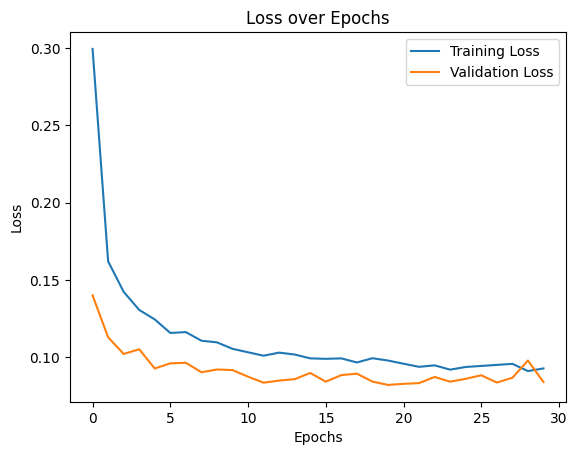

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


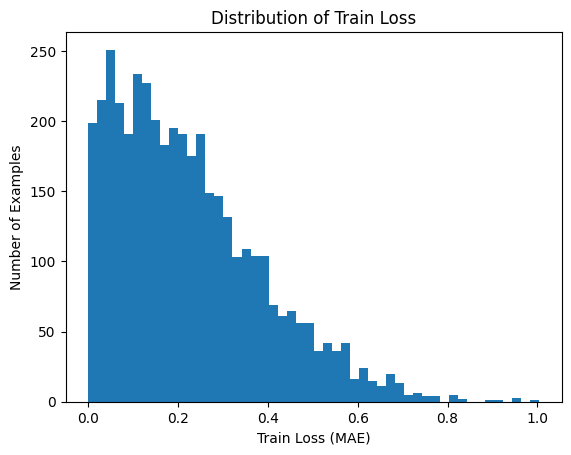

Threshold for train loss:  0.4701422229409218
Number of anomalies detected: 375


In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_predictions = model.predict(X_train)

train_loss = tf.keras.losses.mae(y_train, train_predictions)

# Ploting a histogram of the training loss in the form ofd MAE
plt.hist(train_loss[None, :], bins=50)
plt.xlabel("Train Loss (MAE)")
plt.ylabel("Number of Examples")
plt.title("Distribution of Train Loss")
plt.show()

# Calculating the threshold for anomaly detection
threshold = np.mean(train_loss) + 1.5*np.std(train_loss)
print("Threshold for train loss: ", threshold)

#Applying threshold value for anomaly in training data
anomalies = train_loss > threshold
num_anomalies = np.sum(anomalies)
print(f"Number of anomalies detected: {num_anomalies}")


### Anomaly Detection and Visualization

In [46]:
predictions = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


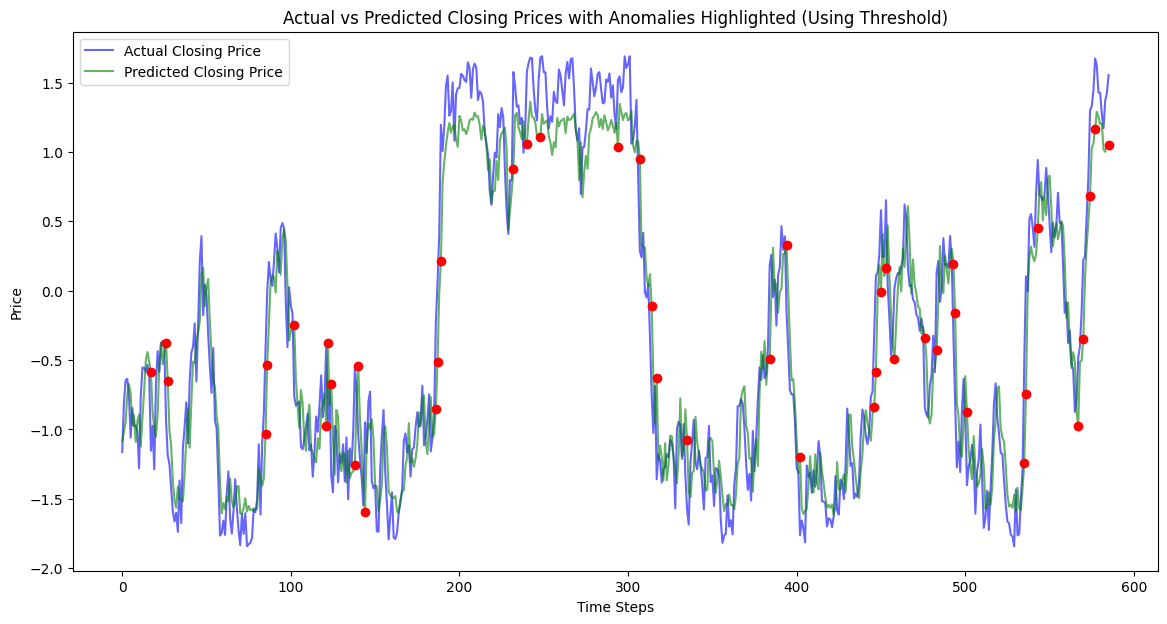

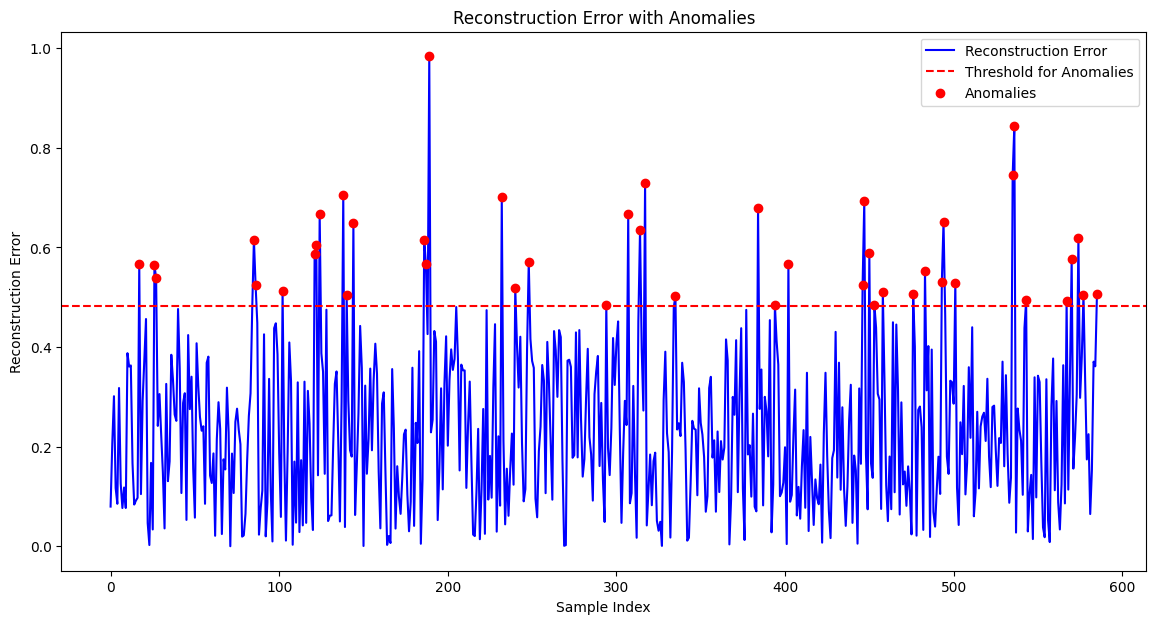

Threshold for anomaly detection:  0.4822568079347601


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#Calculating the difference between actual and predicted closing prices
reconstruction_error = np.abs(predictions.flatten() - y_test)

threshold = np.mean(reconstruction_error) + 1.5* np.std(reconstruction_error)
anomalies = reconstruction_error > threshold

#Visualize actual vs predicted values with anomalies highlighted
plt.figure(figsize=(14, 7))

# Ploting actual closing price
plt.plot(y_test, color='blue', label='Actual Closing Price', alpha=0.6)

# Ploting predictions
plt.plot(predictions, color='green', label='Predicted Closing Price', alpha=0.6)

# Highlight anomalies
for i in range(len(predictions)):
    if anomalies[i]:
        plt.scatter(i, predictions[i], color='red', label='Anomaly' if i == 0 else "", zorder=5)

plt.title("Actual vs Predicted Closing Prices with Anomalies Highlighted (Using Threshold)")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.show()

# Ploting  reconstruction errors
plt.figure(figsize=(14, 7))
plt.plot(reconstruction_error, label='Reconstruction Error', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold for Anomalies')
plt.scatter(np.where(anomalies)[0], reconstruction_error[anomalies], color='red', label='Anomalies', zorder=5)
plt.title("Reconstruction Error with Anomalies")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.show()


print("Threshold for anomaly detection: ", threshold)


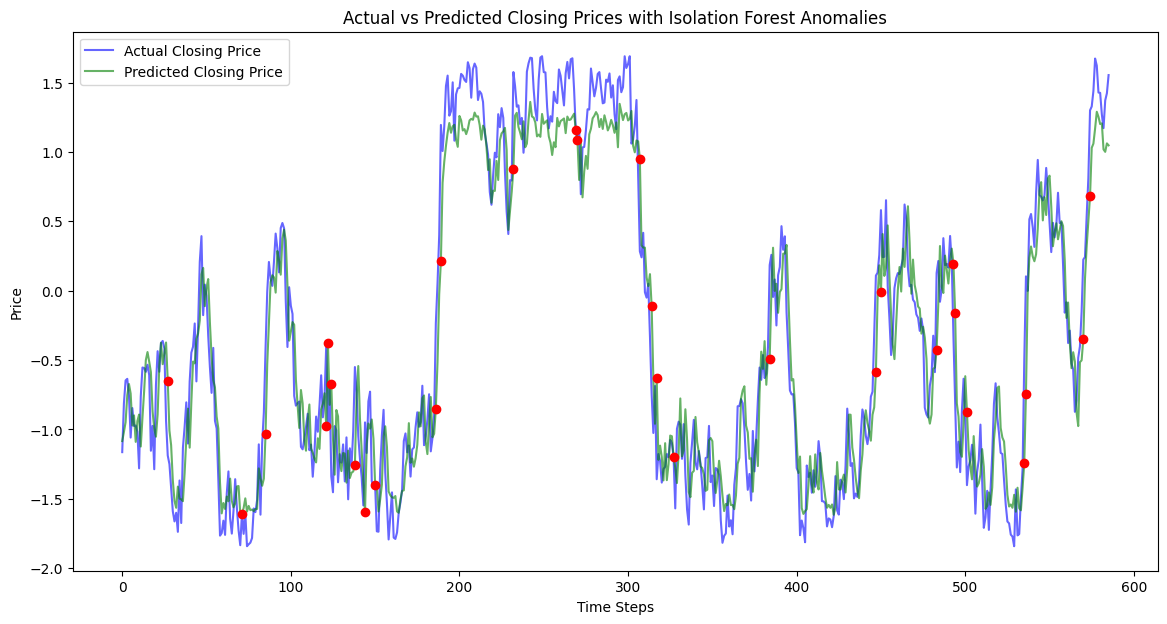

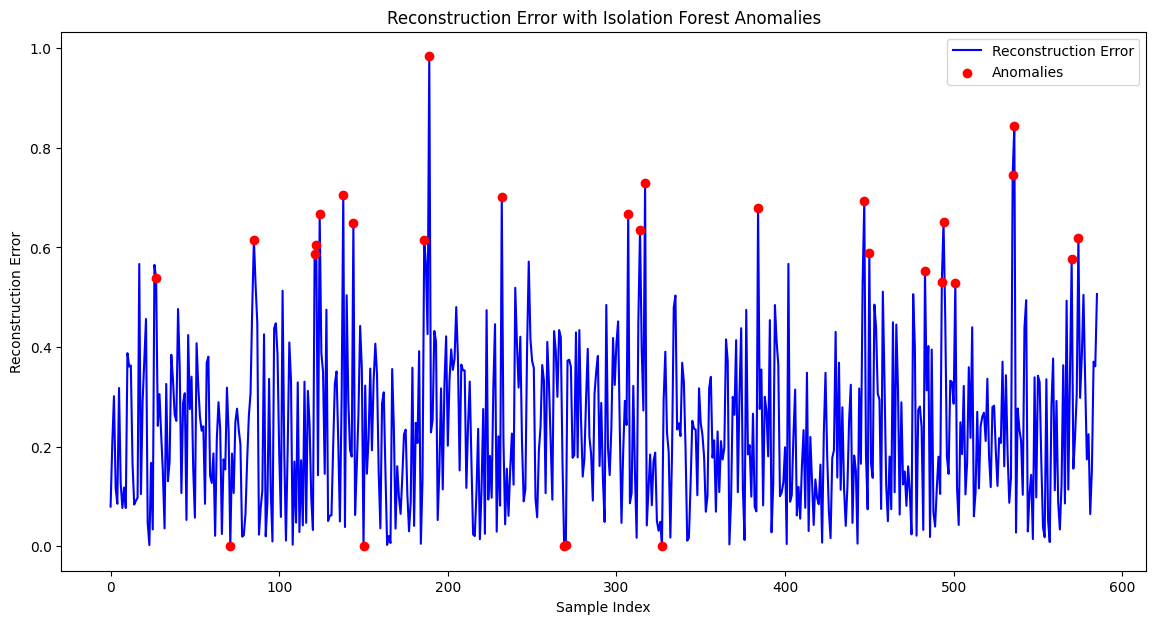

In [48]:
from sklearn.ensemble import IsolationForest
import numpy as np

reconstruction_error = np.abs(predictions.flatten() - y_test)

#Training the Isolation Forest on reconstruction_error
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Taking contamination as 5%
iso_forest.fit(reconstruction_error.reshape(-1, 1))

anomaly_labels = iso_forest.predict(reconstruction_error.reshape(-1, 1))

anomalies = anomaly_labels == -1

plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(y_test, color='blue', label='Actual Closing Price', alpha=0.6)
plt.plot(predictions, color='green', label='Predicted Closing Price', alpha=0.6)

# Highlighting the anomalies Using Isolation Forest
for i in range(len(predictions)):
    if anomalies[i]:
        plt.scatter(i, predictions[i], color='red', label='Anomaly' if i == 0 else "", zorder=5)

plt.title("Actual vs Predicted Closing Prices with Isolation Forest Anomalies")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot reconstruction error with Isolation Forest anomalies
plt.figure(figsize=(14, 7))
plt.plot(reconstruction_error, label='Reconstruction Error', color='blue')
plt.scatter(np.where(anomalies)[0], reconstruction_error[anomalies], color='red', label='Anomalies', zorder=5)
plt.title("Reconstruction Error with Isolation Forest Anomalies")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.show()
